## 第4回課題: 恒星のスペクトルと水素原子の吸収線

In [1]:
# 必要なパッケージのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

まずはこれまでと同様にデータを読み込む。star3_spectrum.txtをColabにアップロードするのも忘れずに。

In [3]:
data = pd.read_csv("star3_spectrum.txt", comment='#')

波長が wav(nm), 明るさが flux の列に入っている。

In [4]:
data

,wav(nm),flux
0,350.002944,0.716843
1,350.042960,0.741507
2,350.082975,0.751566
3,350.122990,0.749399
4,350.163005,0.738812
...,...,...
8742,699.818599,0.661774
8743,699.858615,0.663837
8744,699.898630,0.665489
8745,699.938646,0.666031


numpy の配列として取り出しておこう。

In [46]:
wav = np.array(data['wav(nm)'])
flux = np.array(data['flux'])

### 課題1: スペクトルのプロット

縦軸にflux, 横軸にwavをプロットしよう。軸にはラベルと単位もつける。縦軸は normalized flux、横軸は wavelength (nm) としよう（wavelengthは波長の意味）。
ラベルの付け方は[lecture2-2_plot.ipynb](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture2_tutorial/lecture2-2_plot.ipynb)を参照。

Text(0, 0.5, 'normalized flux')

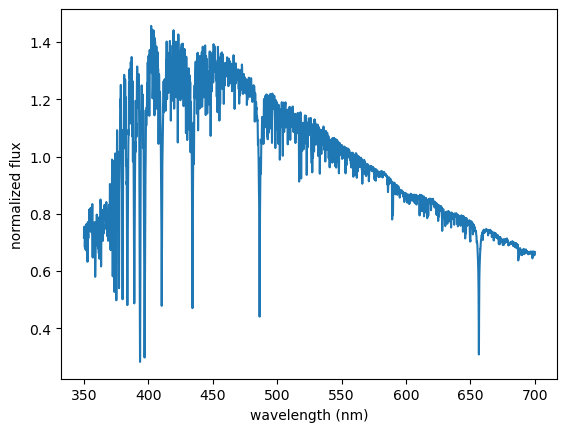

In [ ]:
plt.plot(wav, flux)
plt.xlabel("wavelength (nm)")
plt.ylabel("normalized flux");

xlabel, ylabelの引数は文字列なので " " で挟む。

### 課題2: 水素原子のスペクトル系列

水素原子の電子軌道の離散化されたエネルギー準位は、$n=1,2,3,\dots$として
$$
	E_n = -13.60569\dots \,\mathrm{eV}\cdot {1 \over n^2}
$$
で与えられる。$\mathrm{eV}$（電子ボルト）はエネルギーの単位で、$1\mathrm{eV}=1.602176634\times10^{-19}\,\mathrm{J}$である。

エネルギー準位が $n=2 \to m$ に励起されるとき、原子はエネルギー$E_m - E_2$をもつ光子を吸収する。光子の波長を$\lambda$とすると、そのエネルギーは$hc/\lambda$ ($h$はプランク定数、$c$は真空中の光速度）で与えられるので、
$$
    {hc \over \lambda} = E_m - E_2
$$
が成り立つ。数値を入れて計算すると
$$
    {1\over \lambda} \approx 1.09678 \times 10^7\,\mathrm{m}^{-1} \left({1\over n^2} - {1\over m^2}\right)
$$
となる。

以下では先ほどのlecture4-1_function.ipynbや[lecture3_kepler3.ipynb](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture3_kepler3/lecture3_kepler3.ipynb)の課題4の例を参考にして、$m$を与えたときに吸収される光の**波長$\lambda$をnm単位で**計算する関数を作ろう。$1/\lambda$ではなく$\lambda$を計算する。関数名は balmer とすること。

$10^7$はPythonでは1e7と表記する。例えば$2\times 10^3$なら

In [8]:
2e3

2000.0

でちゃんと2000になっている。$0.01 = 1 \times 10^{-2}$なら

In [9]:
1e-2

0.01

とすればよい。掛け算とかも普通にできる:

In [10]:
1e2 * 1e-2

1.0

In [11]:
def balmer(m):
    """mを入れて波長を計算する関数を作成
    一度に計算しても良いが、まず上の式で波長の逆数を計算（単位1/m）-> 逆数をとって波長をm単位で計算 -> nm単位に換算 のように順番にやると間違えにくい。
    その際、ステップごとに新しい文字を定義して書いてよい。lecture3_kepler3.ipynbの課題4でもそのようにしている。
    """
    wav_inv = 1.09678e7 * (1/4 - 1/m**2) # 波長の逆数（inverse）を計算、波長の単位はメートル
    wav_m = 1 / wav_inv # 波長、メートル単位なので _m とつけておいた
    wav_nm = wav_m * 1e9 # m -> nm に変換
    return wav_nm

balmer(3), balmer(4), balmer(5)の値を計算しよう。

In [12]:
balmer(3), balmer(4), balmer(5)

(656.4671128211673, 486.271935423087, 434.1713709134705)

### 課題3

課題1で作成したプロット上に、課題2の関数で計算した balmer(3), balmer(4), balmer(5), ...の波長を縦線でプロットしたものを作ろう。課題1でプロットしたセルの中身を下にコピーし、そこに書き加えていけばよい。

* plt.axvline(x=...) とすると好きなxの位置に縦線が引ける。vline は vertical（垂直）な線。同様に水平な線は axhline (hはhorizontal) で引ける。
* plt.axvline(x=..., c='gray') のようにc=...で色を変えると見やすい。ちなみに色の一覧は　https://matplotlib.org/stable/gallery/color/named_colors.html　にある。
* balmer(3), balmer(4), balmer(5), ...をプロットするとき、できれば lecture4-2_for-loop.ipynb でやったfor文を使ってみよう。

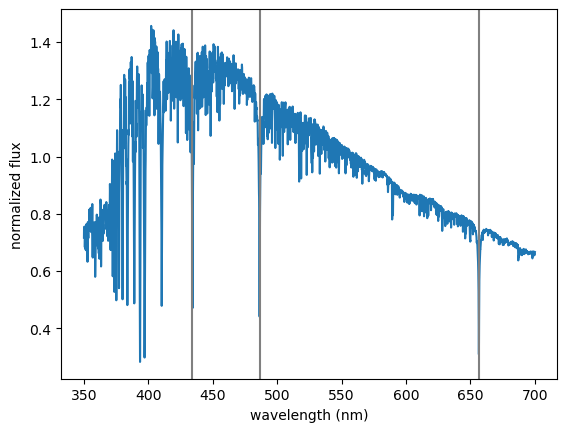

In [14]:
plt.plot(wav, flux)
plt.xlabel("wavelength (nm)")
plt.ylabel("normalized flux")

for i in [3,4,5]:
    plt.axvline(x=balmer(i), color='gray')

確かに吸収線の波長と一致していることがわかる。for文を使えば他の$m$についても以下のように簡単に引ける。例えば$m=99$まで引いてみると

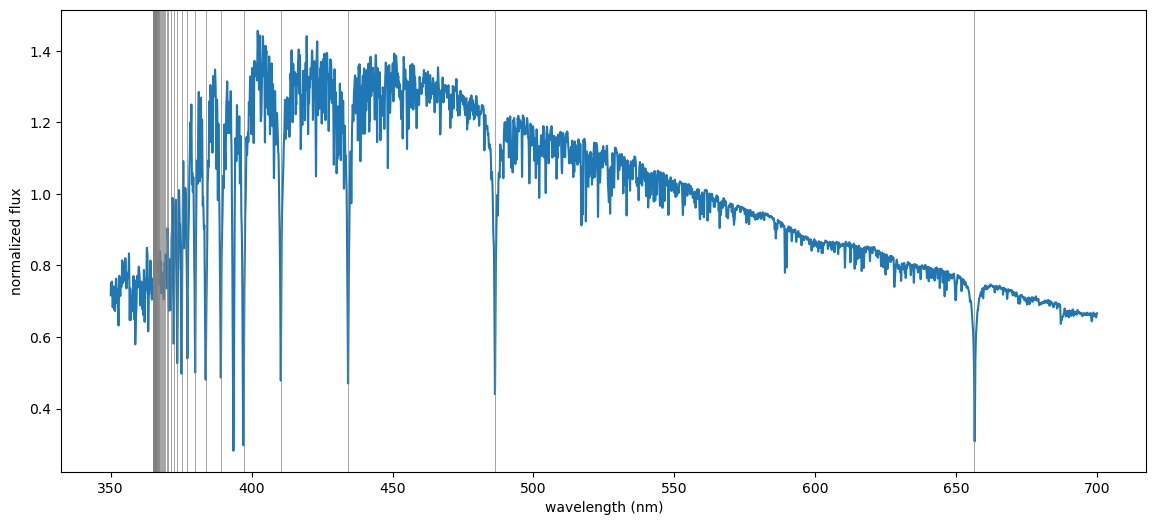

In [ ]:
plt.figure(figsize=(14,6)) # 図を大きくする

plt.plot(wav, flux)
plt.xlabel("wavelength (nm)")
plt.ylabel("normalized flux")

for i in range(3, 100):
    plt.axvline(x=balmer(i), color='gray', lw=0.5) # 見づらいので線を少し細くした; lwはlinewidth（線の太さ）の意味

$m$を大きくするに従って吸収の波長が一定の値に近づいている様子が見える（上の$\lambda$の式で$1/m^2 \to 0$となるため）。

ちなみに$E_n$より大きなエネルギーを与えると、電子は束縛状態を離れて電離する。これよりエネルギーの大きい（波長が短い）光は波長が特定の値でなくても吸収される。これが左側の凹みに対応している。

### 課題4 （これ以降は余裕があれば; 5を先にやってもよい）

pyplot.xlim(a,b)などとすると、x軸の範囲をaからbに制限できる。これを用いてbalmer(3)の波長の周囲を拡大してみよう。実際の吸収線の波長と計算した波長は厳密には一致していないことがわかる。なぜ一致しないのか考え、定量的に解釈してみよう。真空中の光速度がおおよそ$2.998 \times 10^8\,\mathrm{m/s}$であることを用いて良い。

(653.4671128211673, 659.4671128211673)

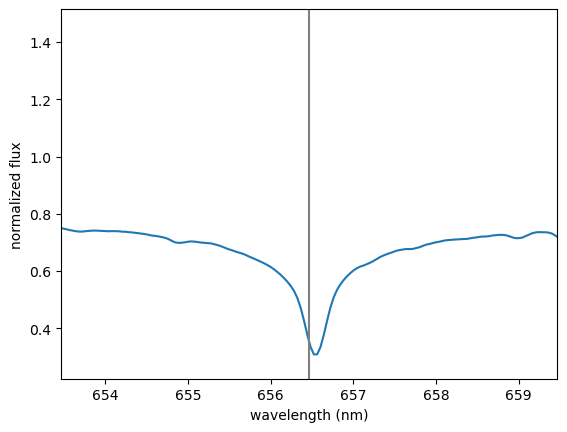

In [23]:
bal3 = balmer(3) # 最初に1回だけ計算
plt.plot(wav, flux)
plt.xlabel("wavelength (nm)")
plt.ylabel("normalized flux")
plt.axvline(x=bal3, color='gray') # balmer(3)に縦線
plt.xlim(bal3 - 3, bal3 + 3) # 周囲+/-3nmを拡大

確かにずれていることがわかる。ちなみに目分量でbalmer(3)の波長を1.0001（=1+1e-4）倍してみると、下図のように大体重なる:

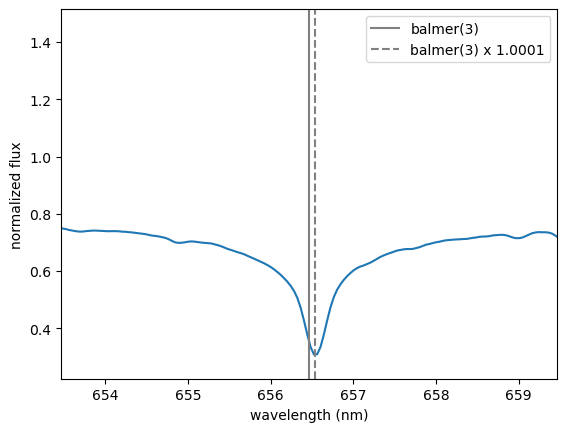

In [34]:
plt.plot(wav, flux)
plt.xlabel("wavelength (nm)")
plt.ylabel("normalized flux")
plt.axvline(x=bal3, color='gray', label='balmer(3)') # 線のラベルを追加
plt.xlim(bal3 - 3, bal3 + 3)
plt.axvline(x=bal3*(1+1e-4), color='gray', ls='dashed', label='balmer(3) x 1.0001') # 1.0001倍した線。ls（linestyle）で点線に変更
plt.legend() # このコマンドでラベルが図上に表示される

第5回の講義で扱うように、このようなずれは光のドップラー効果で生じる。恒星の観測者に対する相対的な運動速度の視線成分の大きさを$v$とすると、波長のずれ$\Delta\lambda$は
$$
{\Delta \lambda \over \lambda} \approx {v\over c}
$$
を満たす（$c$は真空中の光速度）。よって、この場合の$v$は
$$
1.0001 - 1 \approx {v\over c}
$$
より
$$
v \approx c \times 10^{-4} \approx 30\,\mathrm{km/s}
$$
程度と計算できる。

### 課題5 

授業で紹介したプランク（Planck）関数の式
$$
I(\lambda; T) = {2hc^2 \over \lambda^5}
{1 \over \mathrm{e}^{hc\over \lambda k_\mathrm{B}T} - 1}
$$
のグラフを、$T=4000\,\mathrm{K}$, $T=7000\,\mathrm{K}$, $T=10000\,\mathrm{K}$の3つの場合に上記のスペクトルと重ねてプロットしてみよう。ここで、
$$
h = 6.6260701 \times 10^{-34}\,\mathrm{J}\cdot\mathrm{s}, \quad k_\mathrm{B}=1.380649\times10^{-23}\,\mathrm{J}/\mathrm{K}, \quad c=2.99792458\times 10^8\,\mathrm{m/s}
$$
である（それぞれプランク定数, ボルツマン定数, 真空中の光速度）。

温度$T$を変えたいので、波長の配列と温度$T$を引数として、プランク関数の値の配列を計算する関数を以下のように作ろう。

In [35]:
def planck(wav, T):
    """プランク関数の値を計算する関数を作成

        引数:
            wav: 波長の配列（単位をどうするか考える）
            T: 温度（K）

        返値:
            wavと同じ長さのIの配列
    
    """
    wav_m = wav * 1e-9 # 引数wavがnm単位と想定し、mに変換
    h = 6.6260701e-34 
    k = 1.380649e-23 
    c = 2.99792458e8
    
    x = h * c / (wav_m * k * T) # ( ) を忘れずに
    I = 2 * h * c**2 / (np.exp(x) - 1) / wav_m**5 # np.exp()で指数関数が計算できる。
    return I

上の式をそのまま計算すると、縦軸の絶対値は読み込んだデータと合わない。これはデータの縦軸が1付近になるように正規化されている（適当な値で割り算されている）ためである。関数 placnk の中にこのプロセスも含めて出力するとよい。例えば、関数の中で計算した$I$をその最大値で割り、データの方にも同様の操作をするなど。最大値の計算方法は「numpy　最大値」などで検索して調べてみよう。

上の関数 planck を使ってそのままプロットすると

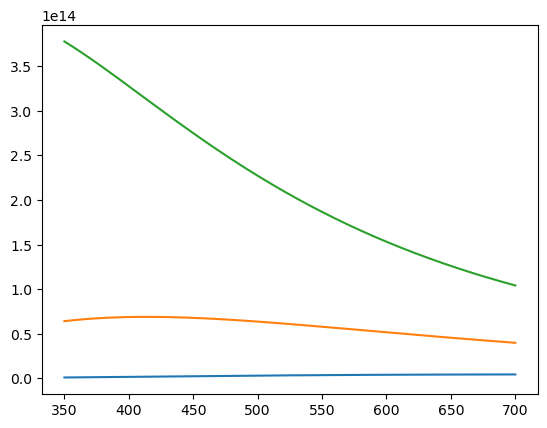

In [52]:
for temp in [4000, 7000, 10000]:
	plt.plot(wav, planck(wav, temp));

のようになる（wavは最初に読み込んだデータをそのまま使っている）。縦軸の1e14は、実際は書いてある数字の$10^{14}$倍という意味。値が違いすぎて形が比べづらい。

そこで、上の計算をした後、その最大値で割ってから出力する関数 planck_norm を新たに作成してみる。

In [53]:
def planck_norm(wav, T):
    I = planck(wav, T) # さっきの関数が再利用できる
    I_max = np.max(I) # np.maxで最大値が計算できる
    return I / I_max

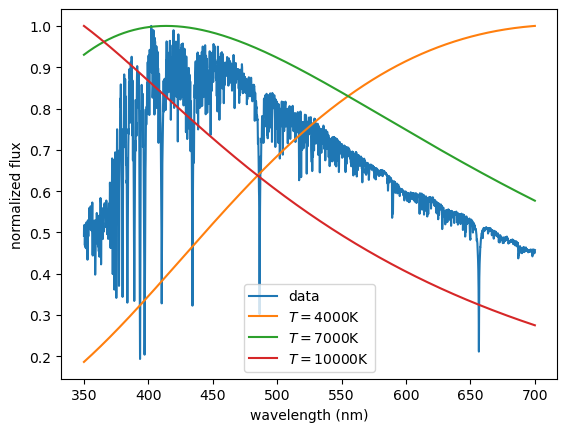

In [51]:
plt.plot(wav, flux / np.max(flux), label="data") # データも同じく最大値で割った。ラベルもつけておく。
plt.xlabel("wavelength (nm)")
plt.ylabel("normalized flux")

for temp in [4000, 7000, 10000]:
    plt.plot(wav, planck_norm(wav, temp), label=f"$T={temp}$K")
plt.legend();

これをみると、大体$7000\,\mathrm{K}$ぐらいが形としては近そうなことがわかる。